In [2]:
import cv2
import os
from marker_detection import MarkerDetection
from localization import Localization
import yaml

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
ARUCO_DICT = {
    "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
    "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
    "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
    "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
    "DICT_ARUCO_MIP_36h12": cv2.aruco.DICT_ARUCO_MIP_36h12,
    "DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11,
}

In [5]:
# frames = ["image.jpeg", "image2.jpeg", "image3.jpeg", "image4.jpeg", "image5.jpeg"]
frames = ["image5.jpeg"]

config_path = os.path.join("..", "..", "..", "configs", "lab2", "config.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
m = MarkerDetection(config=config)
l = Localization(config=config)

Marker ID: 27
Marker Size: 30.0
[[[1216.  577.]
  [1154.  577.]
  [1154.  511.]
  [1216.  512.]]]
4
Marker ID: 27
Marker Size: 30.0
Distance: 604.325973857451
Rotation Vector: [[[-4.23150083e-02  3.14127189e+00 -3.48413142e-05]]]
Translation Vector: [[[5.49180724e+02 2.52210628e+02 4.63429735e-01]]]
Marker ID: 182
Marker Size: 30.0
[[[148. 454.]
  [250. 453.]
  [249. 548.]
  [149. 549.]]]
4
Marker ID: 182
Marker Size: 30.0
Distance: 160.84153276208406
Rotation Vector: [[[-3.14129343e+00  3.43546377e-02  3.47627262e-05]]]
Translation Vector: [[[ 59.33214184 149.49784834   0.29824061]]]
Marker ID: 8
Marker Size: 30.0
[[[249. 548.]
  [149. 549.]
  [148. 454.]
  [250. 453.]]]
4
Marker ID: 8
Marker Size: 30.0
Distance: 160.8415327620742
Rotation Vector: [[[3.43560976e-02 3.14142692e+00 1.74943093e-04]]]
Translation Vector: [[[ 59.33214184 149.49784834   0.29824061]]]


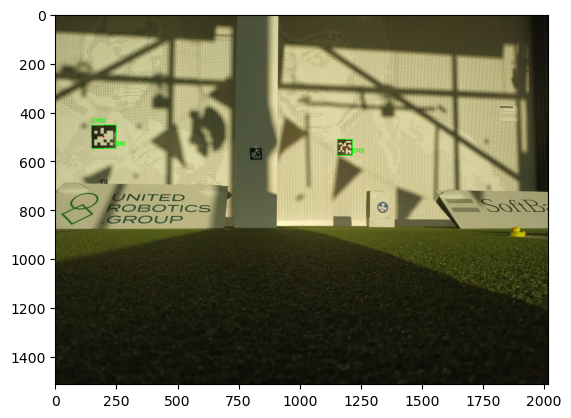

[array([[27]], dtype=int32), array([[182]], dtype=int32), array([[8]], dtype=int32)]
[[27]]
27
[604.325973857451, 160.84153276208406, 160.8415327620742]
[-256.26583725 -164.48192981]


In [12]:
for f in frames:
    f_path = os.path.join("..", "..", "..", "assets", f)
    frame = cv2.imread(f_path)
    if frame is None:
        raise ValueError(f"Could not load image: {f_path}")
    tmp = m.detect(frame)
    location = l.triangulate(tmp)
    print(location)